In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7b_org'

data = pickle.load(open(os.path.join("../", llm+"_results.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

<class 'dict'>
dict_keys(['IR_prison', 'IR_delight', 'IR_staghunt', 'IR_snowdrift', 'biz_prison', 'biz_delight', 'biz_staghunt', 'biz_snowdrift', 'friendsharing_prison', 'friendsharing_delight', 'friendsharing_staghunt', 'friendsharing_snowdrift', 'environment_prison', 'environment_delight', 'environment_staghunt', 'environment_snowdrift', 'team_prison', 'team_delight', 'team_staghunt', 'team_snowdrift'])


In [2]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        if item != '  C' and item != '  D':
            print(key, item)

In [41]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)

# save the distribution to a .txt file
with open(os.path.join("../", llm+"_distribution.txt"), "x") as f:
    for key in distribution.keys():
        # write each line like this: key: {item1: count1, item2: count2}
        f.write(key + ': ' + str(distribution[key]) + '\n')

print('Distribution saved to ' + llm + '_distribution.txt')

FileExistsError: [Errno 17] File exists: '../7b_org_distribution.txt'

In [3]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b_org', '7b_finetuned', '70b_reasoning']
for llm in llms:
    distribution = read_distribution(os.path.join("../", llm+"_distribution.txt"))
    all_data[llm] = distribution
    
# save the all_data dictionary to a .txt file
with open(os.path.join("../", "all_data_reasoning.txt"), "w") as f:
    f.write(str(all_data))
    
print('All data saved to all_data.txt')

# save to a .pkl file
pickle.dump(all_data, open(os.path.join("../", "all_data_reasoning.pkl"), "wb"))

print('All data saved to all_data.pkl')

All data saved to all_data.txt
All data saved to all_data.pkl


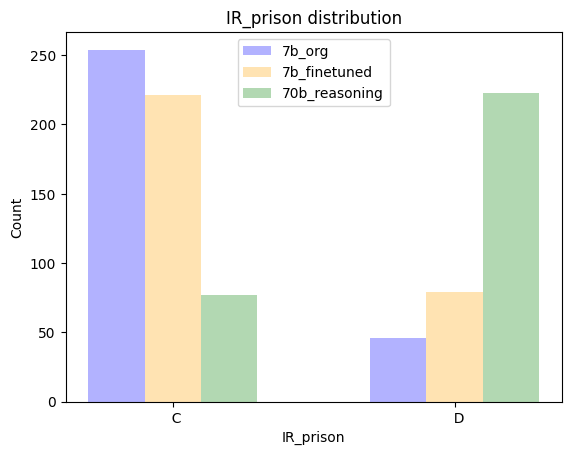

IR_prison


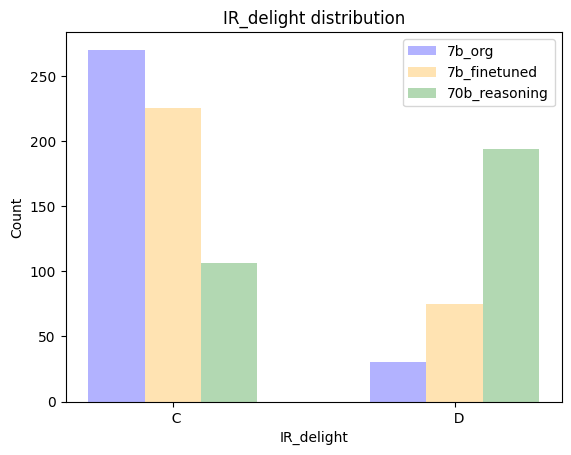

IR_delight


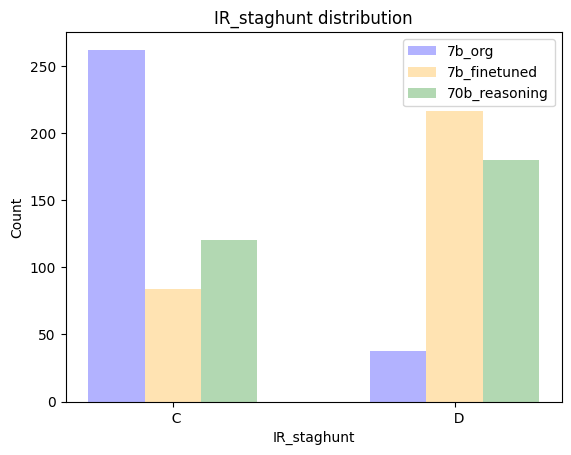

IR_staghunt


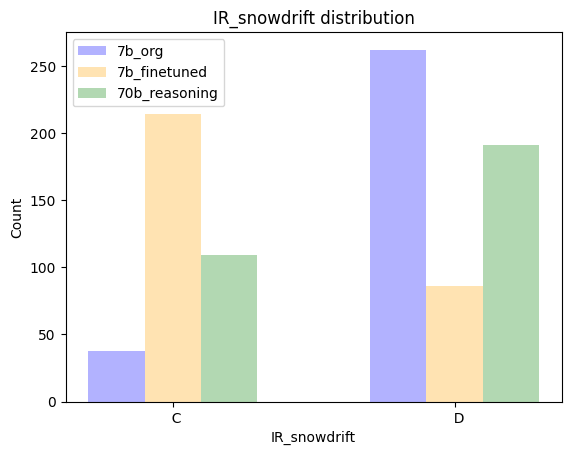

IR_snowdrift


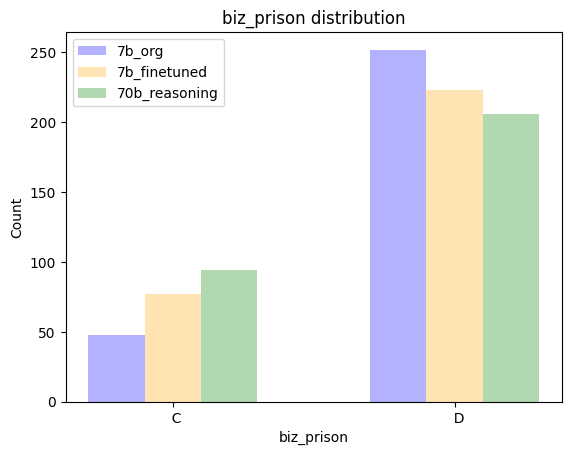

biz_prison


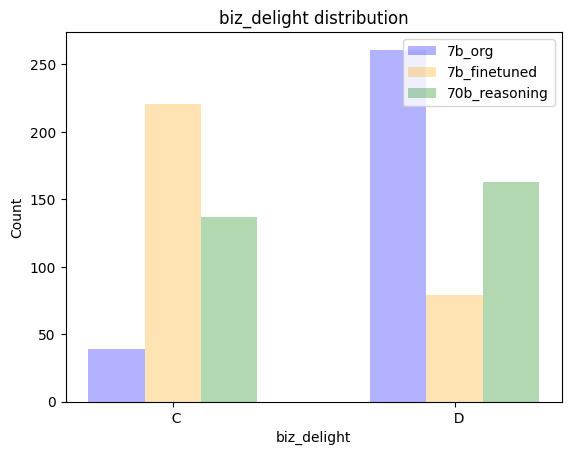

biz_delight


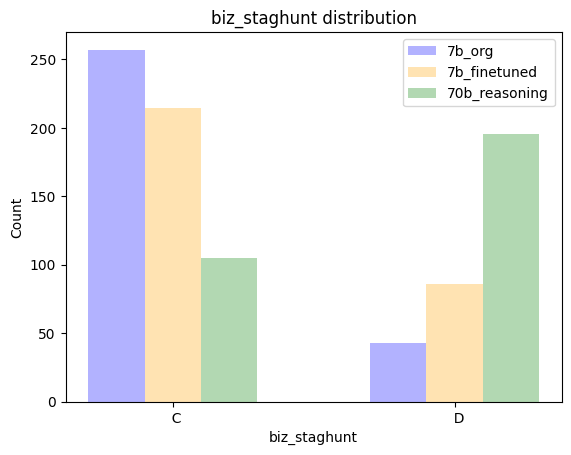

biz_staghunt


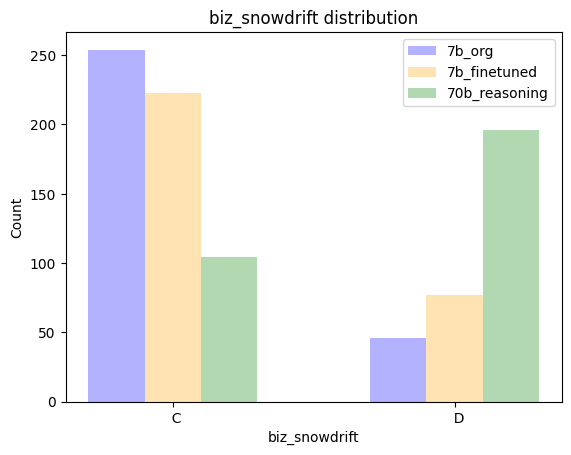

biz_snowdrift


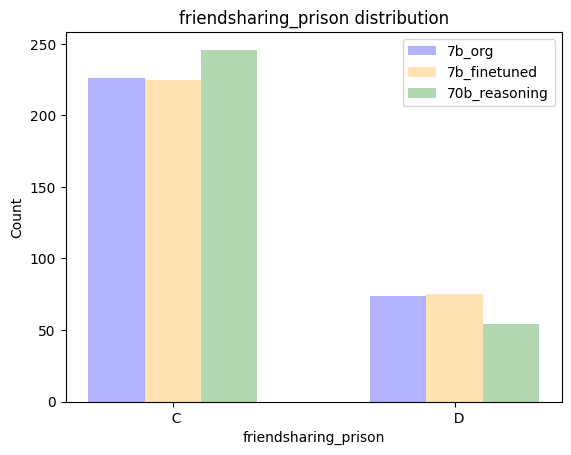

friendsharing_prison


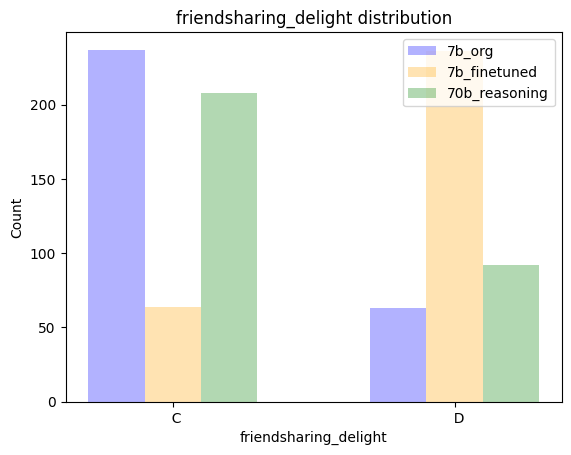

friendsharing_delight


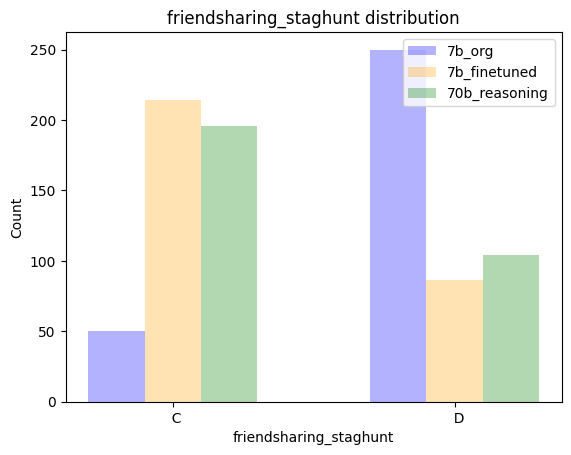

friendsharing_staghunt


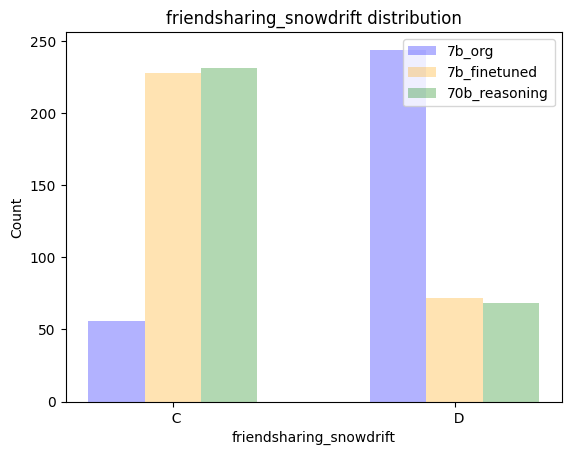

friendsharing_snowdrift


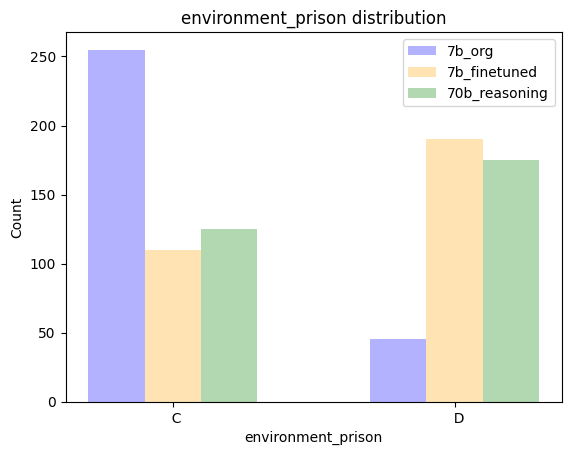

environment_prison


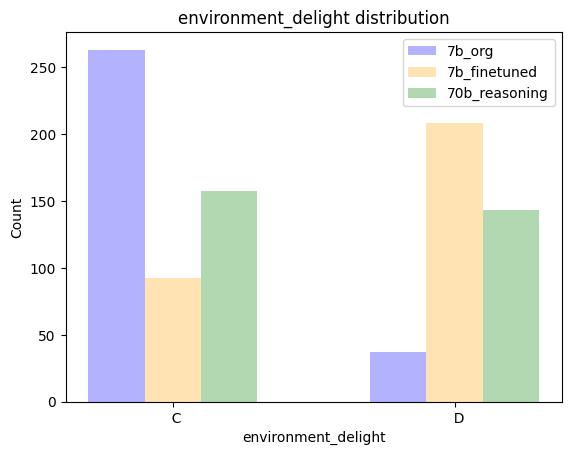

environment_delight


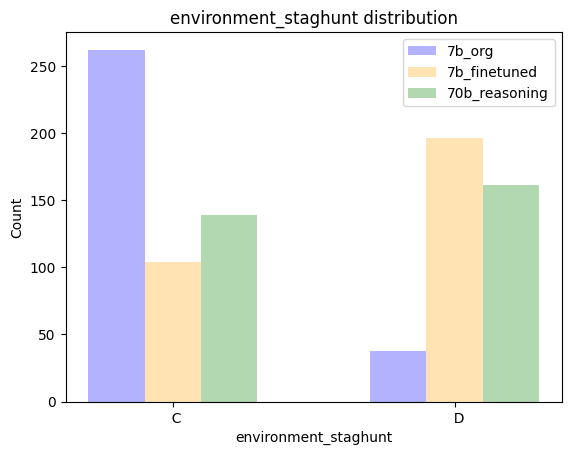

environment_staghunt


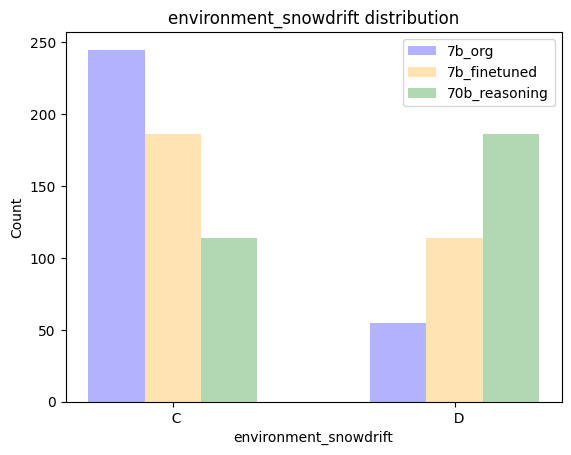

environment_snowdrift


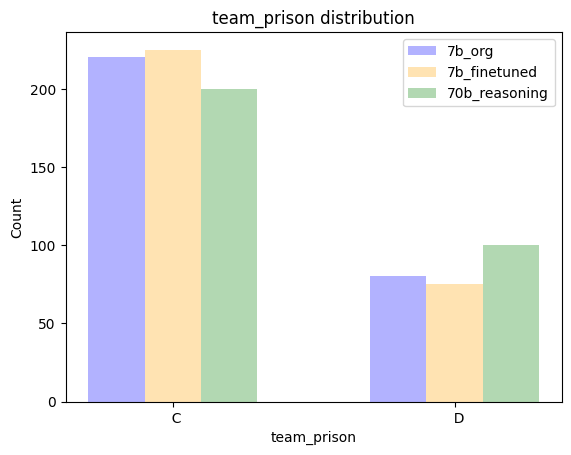

team_prison


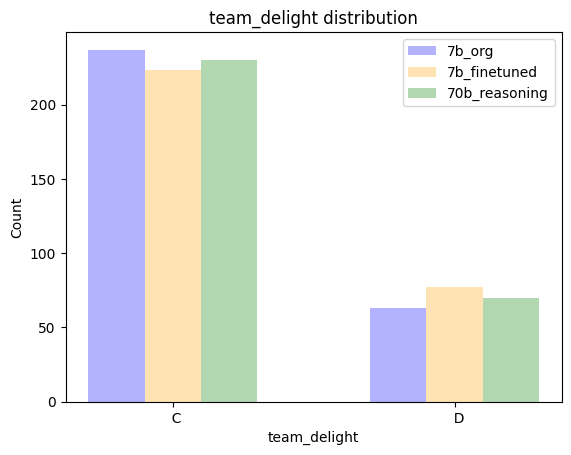

team_delight


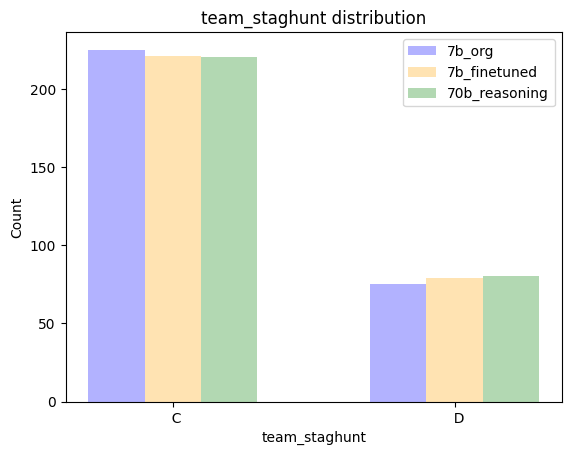

team_staghunt


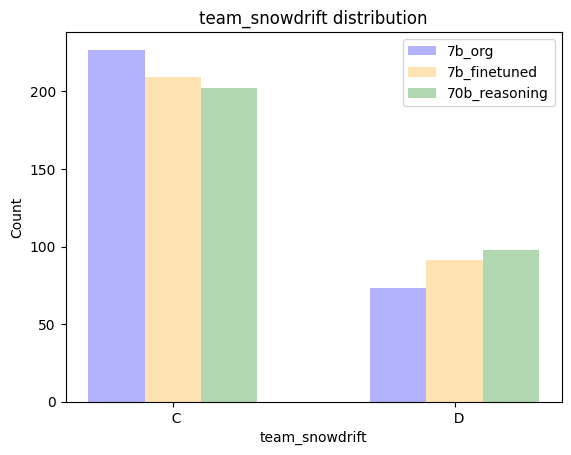

team_snowdrift


In [4]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.3, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
compare_distribution(all_data, keys)

In [59]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[1]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'prison': ['IR_prison',
              'biz_prison',
              'friendsharing_prison',
              'environment_prison',
              'team_prison'],
             'delight': ['IR_delight',
              'biz_delight',
              'friendsharing_delight',
              'environment_delight',
              'team_delight'],
             'staghunt': ['IR_staghunt',
              'biz_staghunt',
              'friendsharing_staghunt',
              'environment_staghunt',
              'team_staghunt'],
             'snowdrift': ['IR_snowdrift',
              'biz_snowdrift',
              'friendsharing_snowdrift',
              'environment_snowdrift',
              'team_snowdrift']})

In [60]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.2
    llm_colors = {'7b_org': 'blue', '7b_finetuned': 'orange', '70b_reasoning': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            print(llm, game, distribution[game]['  C'], x[i])
            plt.bar(x[i], distribution[game]['  C'], width=bar_width, alpha=0.5, label=game, color=color)
            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
    
    # edited valid games should remove its context part if the category is 'Context'
    # edited valid games should remove its game part if the category is 'Game'
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        edited_valid_games = [re.sub(r'.*_', '', game) for game in valid_games]
    print(valid_games)
    print(edited_valid_games)
    valid_games = edited_valid_games
    
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 3 for pos in range(len(valid_games))], valid_games, fontsize=15)
    # set the xticks size to be larger
    
    plt.xlabel(category, fontsize=15)
    plt.ylabel('Cooperation', fontsize=15)
    plt.title(f'{category_type} {category} distribution', fontdict={'fontsize': 16})
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    # save plot
    if category_type == 'Context':
        plt.savefig(os.path.join("../new_figs/context", category + '_distribution.png'))
    else:
        plt.savefig(os.path.join("../new_figs/game", category + '_distribution.png'))
    plt.close()

for category in categorized_keys:
    aggregated_comparison_by_category(all_data, category, category_type='Game')



7b_org IR_prison 254 0.0
7b_org biz_prison 252 1.0
7b_org friendsharing_prison 226 2.0
7b_org environment_prison 255 3.0
7b_org team_prison 220 4.0
7b_finetuned IR_prison 221 0.2
7b_finetuned biz_prison 223 1.2
7b_finetuned friendsharing_prison 225 2.2
7b_finetuned environment_prison 190 3.2
7b_finetuned team_prison 225 4.2
70b_reasoning IR_prison 77 0.4
70b_reasoning biz_prison 94 1.4
70b_reasoning friendsharing_prison 246 2.4
70b_reasoning environment_prison 125 3.4
70b_reasoning team_prison 200 4.4
['IR_prison', 'biz_prison', 'friendsharing_prison', 'environment_prison', 'team_prison']
['IR', 'biz', 'friendsharing', 'environment', 'team']
7b_org IR_delight 270 0.0
7b_org biz_delight 261 1.0
7b_org friendsharing_delight 237 2.0
7b_org environment_delight 263 3.0
7b_org team_delight 237 4.0
7b_finetuned IR_delight 225 0.2
7b_finetuned biz_delight 221 1.2
7b_finetuned friendsharing_delight 236 2.2
7b_finetuned environment_delight 208 3.2
7b_finetuned team_delight 223 4.2
70b_reasoning 

In [61]:
def merge_images(folder_path, output_path):
    # merge five .png files into one .png file, using the following layout:
    # 1 2
    #  3
    # 4 5

    # the middle row is only one image in the middle of the row
    # the top and bottom rows have two images each

    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 3 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (width//2, height))
    new_image.paste(images[3], (0, 2 * height))
    new_image.paste(images[4], (width, 2 * height))
    
    # make the empty space in the left and right of the middle image white
    for j in range(height):
        for i in range(width//2):
            new_image.putpixel((i, height + j), (255, 255, 255))
        for i in range(width*3//2, 2*width):
            new_image.putpixel((i, height + j), (255, 255, 255))
       
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)

merge_images(os.path.join("../new_figs/context"), os.path.join("../new_figs", "context_distribution.png"))

Images merged and saved to ../new_figs\context_distribution.png


In [62]:
def merge_images_of_four(folder_path, output_path):
    # merge four .png files into one .png file, using the following layout:
    # 1 2
    # 3 4
    
    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (0, height))
    new_image.paste(images[3], (width, height))
    
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)
    
merge_images_of_four(os.path.join("../new_figs/game"), os.path.join("../new_figs", "game_distribution.png"))

Images merged and saved to ../new_figs\game_distribution.png


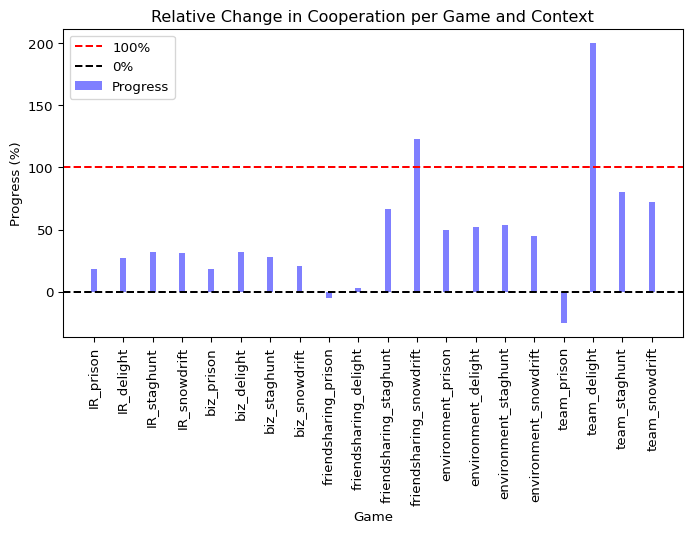

In [63]:
# for each game and context, the goal of finetuning was to reach the results of the 70b model
# so the initial model is 7b_org, the finetuned model is 7b_finetuned, and the target model is 70b
# given this, compare the progress of 7b_org and 7b_finetuned towards 70b by this formula:
# progress = (7b_finetuned - 7b_org) / (70b - 7b_org) * 100

def compare_progress(all_data, keys):
    my_dpi = 96
    plt.figure(figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)

    # plt.figure(figsize=(10, 5))
    bar_width = 0.2
    bar_positions = []

    progress = [(all_data['7b_finetuned'][key]['  C'] - all_data['7b_org'][key]['  C']) / (all_data['70b_reasoning'][key]['  C'] - all_data['7b_org'][key]['  C']) * 100 for key in keys]
    x = [pos for pos in range(len(keys))]        
    plt.bar(x, progress, width=bar_width, alpha=0.5, label='Progress', color='blue')
    # draw a line at y=100
    plt.axhline(y=100, color='r', linestyle='--', label='100%')
    plt.axhline(y=0, color='black', linestyle='--', label='0%')
    plt.xticks([pos for pos in range(len(keys))], keys, rotation=90)
    plt.xlabel('Game')
    plt.ylabel('Progress (%)')
    plt.title('Relative Change in Cooperation per Game and Context')
    plt.legend()
    plt.savefig(os.path.join("../new_figs", "progress.png"), dpi=my_dpi)
    plt.show()
    
    
compare_progress(all_data, keys)

[-33, -29, -1, -65, 5]
[-45, -40, -1, -55, -14]
[-46, -43, -36, -66, -4]
[-48, -31, -16, -59, -18]


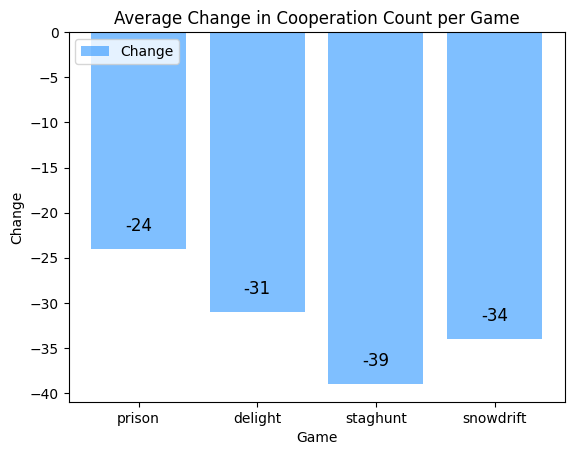

In [91]:
# get the average progress per each game, and then per each context
def get_average_progress(all_data, keys, category_type='Game'):
    # categorize by first part of the key
    categorized_keys = defaultdict(list)
    for item in keys:
        if category_type == 'Context':
            prefix = re.sub(r'_.*', '', item)
        else:
            prefix = re.sub(r'.*_', '', item)
        categorized_keys[prefix].append(item)
    
    # get the average progress for each category
    average_progress = {}
    for category in categorized_keys:
        progress = [(all_data['7b_finetuned'][key]['  C'] - all_data['7b_org'][key]['  C']) for key in categorized_keys[category]]
        print(progress)
        average_progress[category] = int(sum(progress) / len(progress))
    return average_progress

def visualize_average_progress(average_progress, category_type='Game'):
    plt.figure()
    x = [pos for pos in range(len(average_progress))]
    plt.bar(x, average_progress.values(), alpha=0.5, label='Change', color='#0080FF')
    # write the y value on top of each bar
    for i, v in enumerate(average_progress.values()):
        plt.text(i, v+2, str(v), ha='center', fontsize=12)
    
    plt.xticks(x, average_progress.keys(), fontsize=10)
    plt.xlabel(category_type)
    plt.ylabel('Change')
    plt.title(f'Average Change in Cooperation Count per {category_type}')
    plt.legend(loc='upper left')
    plt.savefig(os.path.join("../new_figs", f"average_change_{category_type}.png"))
    plt.show()
    


category_type = 'Game'
average_progress = get_average_progress(all_data, keys, category_type)
visualize_average_progress(average_progress, category_type)

In [49]:
# merge two images into one
# merge these two images: average_progress_Game.png and average_progress_Context.png

images = [Image.open(os.path.join("../new_figs", f"average_progress_{category_type}.png")) for category_type in ['Game', 'Context']]
width, height = images[0].size
total_width = 2 * width 
total_height = height   
new_image = Image.new('RGB', (total_width, total_height))
new_image.paste(images[0], (0, 0))
new_image.paste(images[1], (width, 0))
new_image.save(os.path.join("../new_figs", "average_progress.png"))
print('Images merged and saved to ' + os.path.join("../new_figs", "average_progress.png"))

Images merged and saved to ../new_figs\average_progress.png
